# Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data
df = pd.read_csv("wine-clustering.csv")
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


# Preprocessing the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
#No null Values, still for our convience
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
#Checking for Duplicates, if any
print(df.duplicated().sum())
#Removing
df.drop_duplicates(inplace = True)
#Rechecking
print(df.info())

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 19.5 KB
None


In [6]:
#Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)
#X_scaled

new_df = pd.DataFrame(X_scaled,columns=df.columns)
X = new_df.values
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

# Making a model for clustering

In [7]:
def random_centroids(new_df, k):
    centroids = []
    for i in range(k):
        centroid = new_df.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [8]:
centroids = random_centroids(new_df, 3)
centroids

,0,1,2
Alcohol,0.457895,0.681579,0.813158
Malic_Acid,0.480237,0.029644,0.175889
Ash,0.331551,0.491979,0.609626
Ash_Alcanity,0.438144,0.427835,0.278351
Magnesium,0.195652,0.086957,0.532609
Total_Phenols,0.748276,0.217241,0.137931
Flavanoids,0.487342,0.559072,0.054852
Nonflavanoid_Phenols,0.264151,0.150943,0.169811
Proanthocyanins,0.757098,0.132492,0.107256
Color_Intensity,0.543515,0.338737,0.206485


In [9]:
def get_labels(new_df, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((new_df - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [10]:
labels = get_labels(new_df, centroids)
labels

0      0
1      1
2      0
3      0
4      1
      ..
173    2
174    2
175    2
176    2
177    2
Length: 178, dtype: int64

In [11]:
def new_centroids(new_df, labels, k):
    centroids = new_df.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [12]:
def plot_clusters(new_df, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(new_df)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

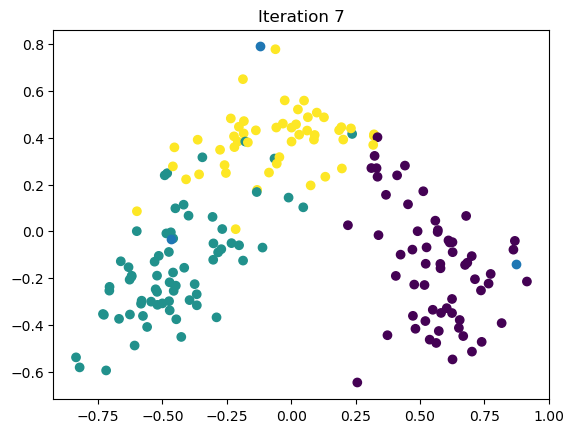

In [13]:
#assigining the values
max_iterations = 100
centroid_count = 3  #That means k

centroids = random_centroids(new_df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

#Clustering

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(new_df, centroids)
    centroids = new_centroids(new_df, labels, centroid_count)
    plot_clusters(new_df, labels, centroids, iteration)
    iteration += 1

# Elbow Method

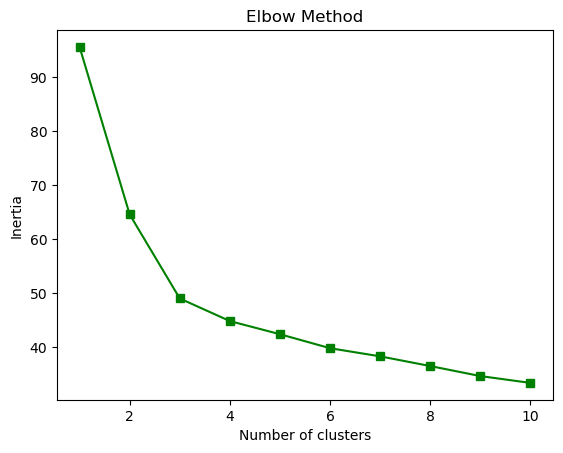

In [14]:
#Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia += [kmeans.inertia_]
    
plt.plot(range(1,11), inertia,'gs-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [15]:
#As we can clearly see that the elbow is atthe value 3, hence no. of clusters = 3
#KNN
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [16]:
kmeans.cluster_centers_

array([[0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397],
       [0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.31137521, 0.23689915, 0.47291703, 0.49991686, 0.2477209 ,
        0.45305895, 0.38240098, 0.4117468 , 0.39742546, 0.14773478,
        0.47351167, 0.58897554, 0.15640099]])

In [17]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

# Finding Coorealtion

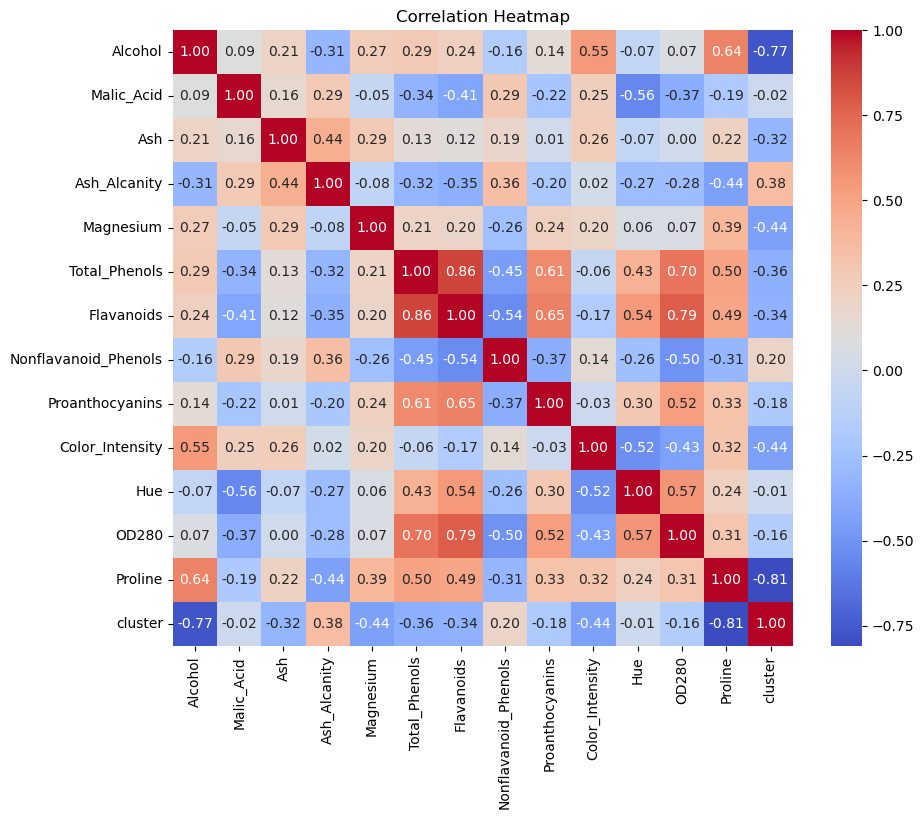

In [23]:
corr_mat = new_df.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [24]:
#As we can clearly see, Total_Phenols and Flavanoids are relating the most, still for our convinience:-
# Find the pair of columns with the highest correlation
highest_corr = corr_mat.unstack().sort_values(ascending=False)
#highest_corr
#Removing the relation between itself
highest_corr = highest_corr[highest_corr.index.get_level_values(0) != highest_corr.index.get_level_values(1)]
column1, column2 = highest_corr.index[0]
print(column1,",",column2)

Flavanoids , Total_Phenols


# Clustering for most relatable Features

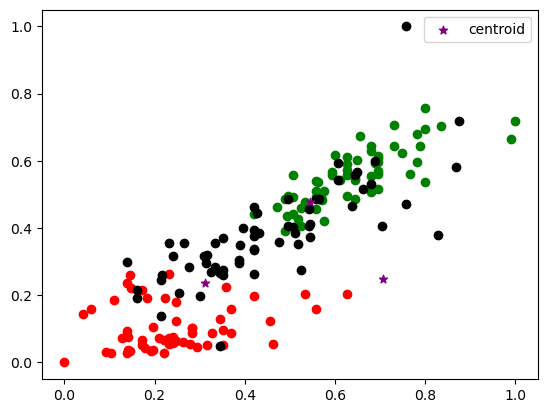

In [25]:
#Adding the column cluster
new_df["cluster"] = kmeans.labels_

#Plotting the graph
sub_df1 = new_df[new_df.cluster==0]
sub_df2 = new_df[new_df.cluster==1]
sub_df3 = new_df[new_df.cluster==2]
plt.scatter(sub_df1.Total_Phenols,sub_df1['Flavanoids'],color='green')
plt.scatter(sub_df2.Total_Phenols,sub_df2['Flavanoids'],color='red')
plt.scatter(sub_df3.Total_Phenols,sub_df3['Flavanoids'],color='black')

#centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()